In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import torch
from nn_magnetics.dataset import get_data_parallel, ChiMode
from nn_magnetics.model import Network
from nn_magnetics.plotting import plot_histograms, plot_heatmaps


In [7]:
DEVICE = "cpu"

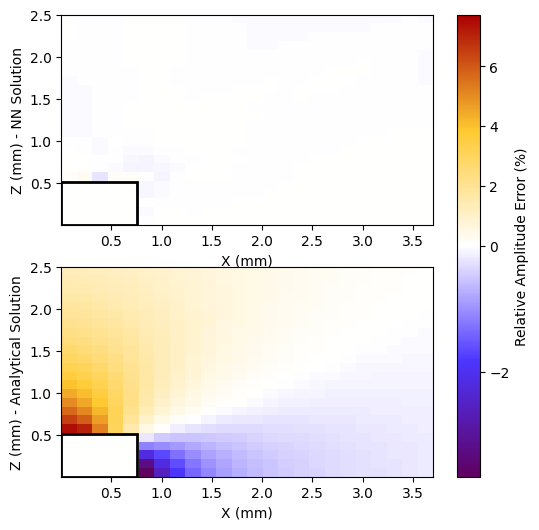

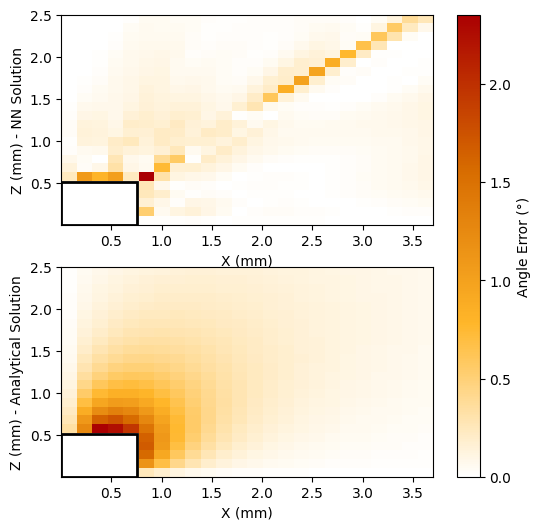

In [11]:
# X_test, B_test = get_data_parallel(
#     "../data/anisotropic_chi/test_isotropic",
#     ChiMode.ANISOTROPIC,
# )

model = Network(
    in_features=7,
    hidden_dim_factor=6,
    out_features=3,
).to(DEVICE, dtype=torch.float64)

model.load_state_dict(
    torch.load(
        "../results/anisotropic_chi_v2/golden-deluge-10/weights.pt",
        weights_only=True,
    )
)

# plot_histograms(
#     X_test=X_test,
#     B_test=B_test,
#     model=model,
#     save_path="../results/anisotropic_chi_v2/golden-deluge-10",
#     show_plot=False,
#     tag="isotropic",
# )

plot_heatmaps(
    model=model,
    save_path="../results/anisotropic_chi_v2/golden-deluge-10",
    # save_path=None,
    tag="isotropic_1",
    chi_mode=ChiMode.ANISOTROPIC,
    eval_path="../data/anisotropic_chi/test_isotropic/data_2.npz",
)